In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./sims/renewable_scales/"
scales = np.linspace(0.1,1.2,23)

In [3]:
scales = [round(x,2) for x in scales]

In [4]:
means = []
var = []
for s in scales:
    dfs = []
    m = []
    v = []
    for i in range(10):
        filename = path + "renewable_{}_{}".format(round(s,2),i)
        dfs.append(pd.read_csv(filename, names=['total_cost', 'true_demand', 'demand_sd', '2x_sup_sd', 'ren_sup', 'rem_demand']))
        try:
            dfs[i] = dfs[i].drop(730) # extra line in some of the files
        except:
            pass
        dfs[i]["total_cost"] = pd.to_numeric(dfs[i]["total_cost"], downcast="float")
        dfs[i]['avg_cost'] = dfs[i]['total_cost'] / dfs[i]['true_demand']
        m.append(dfs[i]['avg_cost'].mean())
        v.append((dfs[i]['avg_cost'].var()))
    m = np.array(m)
    v = np.array(v)
    means.append(m.mean())
    var.append(v.mean())


In [5]:
means

[69.3690984083274,
 70.20596361165596,
 71.39921821825708,
 72.31256734848509,
 73.95907635406013,
 74.57180350086148,
 75.77435931065001,
 77.3184414158907,
 78.67551452195684,
 79.7420909427698,
 80.72127631234085,
 82.21368494249883,
 83.11315259227297,
 84.39503228563585,
 85.93497674426753,
 86.34643454366906,
 87.60153770543732,
 89.59500519489481,
 91.19278433005445,
 92.0756838645742,
 93.56637375189845,
 94.72352233227413,
 95.76076994063212]

In [6]:
plt.rcParams["figure.figsize"] = (12,8)

In [7]:
scale_factors = [round(7000000 * x * 0.4 + 500000)/1000000 for x in scales]

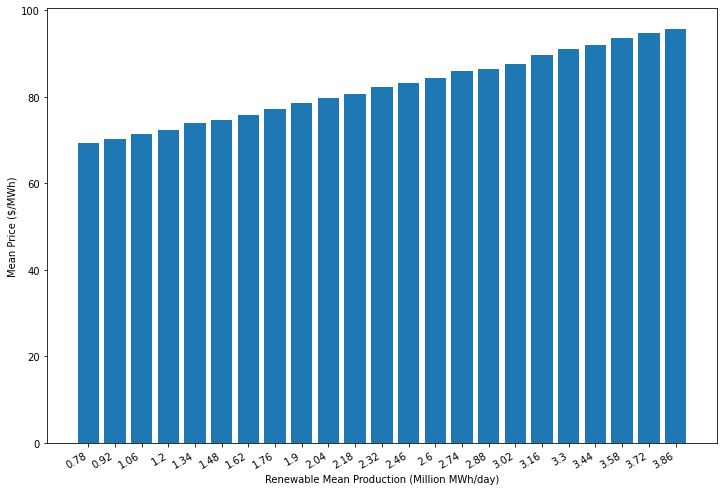

In [8]:
fig,ax = plt.subplots()
ax.bar(np.arange(23),means,tick_label=scale_factors)
ax.set_xticklabels(scale_factors, rotation=30, ha='right')
ax.set_xlabel("Renewable Mean Production (Million MWh/day)")
ax.set_ylabel("Mean Price ($/MWh)")
plt.savefig("ren_prod_vs_avg_price_sensitivity.png")

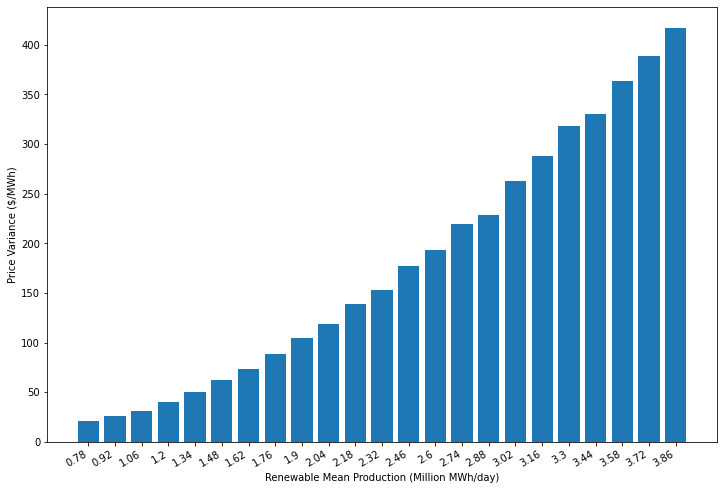

In [9]:
fig,ax = plt.subplots()
ax.bar(np.arange(23),var,tick_label=scale_factors)
ax.set_xticklabels(scale_factors, rotation=30, ha='right')
ax.set_xlabel("Renewable Mean Production (Million MWh/day)")
ax.set_ylabel("Price Variance ($/MWh)")
plt.savefig("ren_prod_vs_price_variance_sensitivity.png")

In [10]:
df = dfs[0]